In [2]:
import matplotlib as mp
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
plt.rcParams["figure.figsize"] = (10,7)
df = pd.read_csv("CREXpita_small.csv", delimiter=',', dtype={'time':'str','unix_time':'str','ihwp':np.int32, 'RTPPITA1CNT':np.float64, 'RTPPITA1CNTSET':np.float64, 'RTPPITA2CNT':np.float64, 'RTPPITA2CNTSET':np.float64}, parse_dates=['time','unix_time'])
df['ihwp_out'] = 1-df['ihwp'] 
df['pita'] = (df['RTPPITA1CNT']-df['RTPPITA1CNTSET']+ df['RTPPITA2CNT']-df['RTPPITA2CNTSET'])/(2.0)
df['shift1'] = df['RTPPITA1CNTSET'].shift(1)
df['shift2'] = df['RTPPITA2CNTSET'].shift(1)
df.loc[df.index[0],'shift1']=0
df.loc[df.index[0],'shift2']=0
df['same']= df.RTPPITA1CNTSET.eq(df.shift1).mul(df.RTPPITA2CNTSET.eq(df.shift2))
df['rms']=df.RTPPITA1CNTSET.rolling(50).std()
print(df)

                      time      unix_time  ihwp  RTPPITA1CNT  RTPPITA1CNTSET  \
0      2019-12-12 18:08:42  1576192121.65     0     -679.766          -575.0   
1      2019-12-12 18:08:48  1576192127.65     0     -683.938          -575.0   
2      2019-12-12 18:08:55  1576192134.65     0     -683.540          -575.0   
3      2019-12-12 18:09:02  1576192141.65     0     -671.205          -575.0   
4      2019-12-12 18:09:17  1576192156.65     0     -685.543          -575.0   
5      2019-12-12 18:09:23  1576192162.65     0     -685.319          -575.0   
6      2019-12-12 18:09:29  1576192168.65     0     -685.319          -575.0   
7      2019-12-12 18:09:35  1576192174.65     0     -684.432          -575.0   
8      2019-12-12 18:09:41  1576192180.65     0     -664.883          -575.0   
9      2019-12-12 18:09:47  1576192186.65     0     -661.911          -575.0   
10     2019-12-12 18:09:53  1576192192.65     0     -682.983          -575.0   
11     2019-12-12 18:09:59  1576192198.6

In [10]:
df_new = df[(df['pita'] != 0) & (df['pita']<1000) & (df['pita']> -1000) ]
#df_new = df[(df['pita'] != 0) & (df['pita']<100) & (df['pita']> -1000)]
df_in = df_new[df_new['ihwp']==1]
df_out = df_new[df_new['ihwp']==0]
nIn = df_in.shape[0]
pita_in = df_in['pita'].sum()
nOut = df_out.shape[0]
pita_out = df_out['pita'].sum()

print("Average in voltage", pita_in/nIn)
print("Average out voltage", pita_out/nOut)

print("Average in retardance", pita_in/nIn*3.1415927/2/12670.)
print("Average out retardance", pita_out/nOut*3.1415927/2/12670.)




Average in voltage -42.43184918217892
Average out voltage -50.582251355427644
Average in retardance -0.005260599354310744
Average out retardance -0.006271066756423701


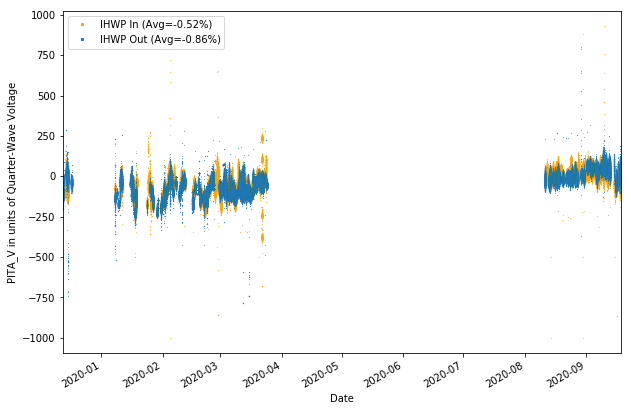

In [11]:
fig, ax = plt.subplots()
#ax2 = ax.twinx()

df_in.plot(x='time',y='pita',style=',', color='orange', ax=ax, label='IHWP In (Avg=-0.52%)',marker='s', markersize=12./fig.dpi)
df_out.plot(style=',',x='time',y='pita', ax=ax, label='IHWP Out (Avg=-0.86%)',marker='s',markersize=12./fig.dpi)
plt.ylabel('PITA_V in units of Quarter-Wave Voltage')
plt.xlabel('Date')
plt.legend(markerscale=12)
#plt.figure(figsize=(10,7))
fig1=plt.gcf()
fig1.savefig('../pitavst.png',bbox_inches='tight')
plt.show()


#print(nIn+nOut)

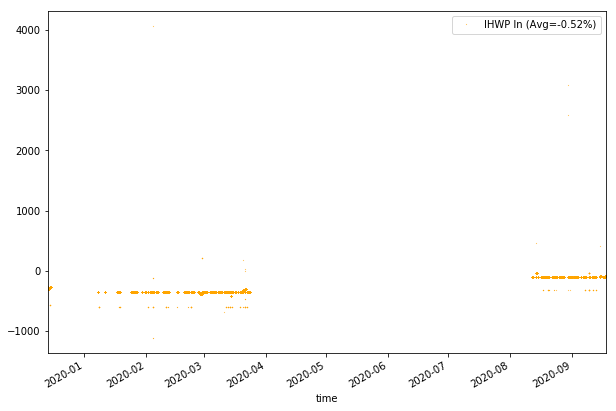

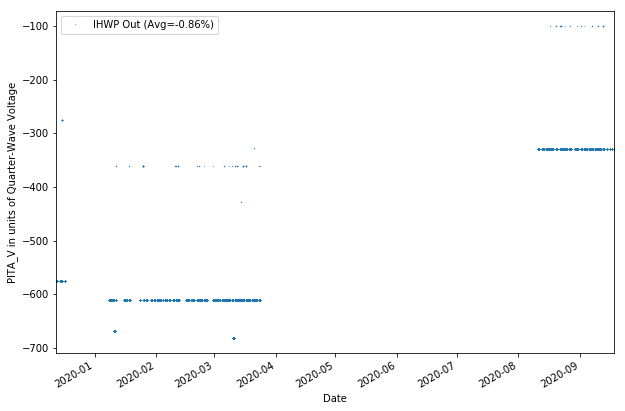

In [12]:
df_in.plot(x='time',y='RTPPITA1CNTSET',style=',', color='orange', label='IHWP In (Avg=-0.52%)',marker='s', markersize=12./fig.dpi)
df_out.plot(style=',',x='time',y='RTPPITA1CNTSET', label='IHWP Out (Avg=-0.86%)',marker='s',markersize=12./fig.dpi)
plt.ylabel('PITA_V in units of Quarter-Wave Voltage')
plt.xlabel('Date')
plt.show()


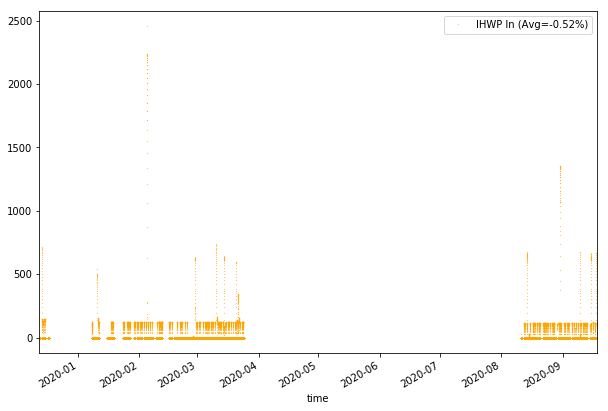

In [13]:
df_new.plot(x='time',y='rms',style=',', color='orange', label='IHWP In (Avg=-0.52%)',marker='s', markersize=12./fig.dpi)
plt.show()
